## Riordan squares and Jacobi continued fractions

Some background information can be found at 
Peter Luschny's [homepage](http://luschny.de/math/seq/RiordanSquare.html).

In the OEIS see [A321620](https://oeis.org/A321620) and [A321960](https://oeis.org/A321960).

### Library Functions 
(Helper functions, skip at first read)

In [1]:
def TaylorList(f, n):
    # Trap: list() need not have length equal to prec()!
    t = f.taylor(x, 0, n+2).list()
    return (t + [0]*(n - len(t)))[0:n]

def toList(R, dim):  
    if isinstance(R, Integer): R = SR(R)
    if isinstance(R, type(SR())):
        if dim == 0: raise ValueError('dim must not be zero.') 
        return TaylorList(SR(R), dim)
    if callable(R):
        if dim == 0: raise ValueError('dim must not be zero.') 
        return [R(n) for n in (0..dim-1)]
    return R
    
def ExponentialWeights(M):
    N = M.nrows(); u = 1
    for k in (1..N-1):
        u *= k
        for m in (0..k):
            j = u if m == 0 else j/m
            M[k, m] *= j
    return M

### Library Function

In [2]:
def RiordanSquare(S, dim=0, expo=false):
    L = toList(S, dim)  
    dim = len(L)
    M = matrix(QQ, dim, dim)
    for n in (0..dim-1): M[n,0] = L[n]
    for k in (1..dim-1):
        for m in (k..dim-1):
            M[m, k] = sum(M[j, k-1]*L[m-j] for j in (k-1..m-1))
    if expo: return ExponentialWeights(M)
    return M

### Examples

In [3]:
Catalan = (1 - sqrt(1 - 4*x))/(2*x)
Riordan = 1 + 2*x/(1 + x + sqrt(1 - 2*x - 3*x^2))
Motzkin = (1 - x - sqrt(1 - 2*x - 3*x^2))/(2*x^2)
Fine = 1 + (1 - sqrt(1 - 4*x))/(3 - sqrt(1 - 4*x))
LargeSchroeder =  (1 - x - sqrt(1 - 6*x + x^2))/(2*x)
LittleSchroeder = (1 + x - sqrt(1 - 6*x + x^2))/(4*x)
Lucas = 1 + x*(1 + 2*x)/(1 - x - x^2)
OrbitalNumbers = (1 + x/(1 - 4*x^2))/sqrt(1 - 4*x^2)
TernaryTrees = sin(arcsin(3*sqrt(x*3/4))/3)/sqrt(x*3/4)
Bell = sum(x^k/prod(1 - j*x for j in (1..k)) for k in (0..30))
PowersOf2 = 1/(1 - 2*x)
All1Seq = 1/(1 - x)
Fibonacci = 1/(1 - x - x^2)
Tribonacci = 1/(1 - x - x^2 - x^3)

In [4]:
RiordanSquare((1 + x - x^2)/(1 - 2*x^2 + x^4), 7)

[ 1  0  0  0  0  0  0]
[ 1  1  0  0  0  0  0]
[ 1  2  1  0  0  0  0]
[ 2  4  3  1  0  0  0]
[ 1  6  8  4  1  0  0]
[ 3  9 15 13  5  1  0]
[ 1 13 28 30 19  6  1]

In [5]:
RiordanSquare(exp(x), 9, true)

[   1    0    0    0    0    0    0    0    0]
[   1    1    0    0    0    0    0    0    0]
[   1    3    1    0    0    0    0    0    0]
[   1    7    6    1    0    0    0    0    0]
[   1   15   25   10    1    0    0    0    0]
[   1   31   90   65   15    1    0    0    0]
[   1   63  301  350  140   21    1    0    0]
[   1  127  966 1701 1050  266   28    1    0]
[   1  255 3025 7770 6951 2646  462   36    1]

In [6]:
RiordanSquare(sec(x)+tan(x), 8, true)

[   1    0    0    0    0    0    0    0]
[   1    1    0    0    0    0    0    0]
[   1    3    1    0    0    0    0    0]
[   2    8    6    1    0    0    0    0]
[   5   27   29   10    1    0    0    0]
[  16  106  150   75   15    1    0    0]
[  61  483  841  550  160   21    1    0]
[ 272 2498 5166 4151 1575  301   28    1]

In [7]:
RiordanSquare(exp(x)*x, 8, true)

[   0    0    0    0    0    0    0    0]
[   1    0    0    0    0    0    0    0]
[   2    2    0    0    0    0    0    0]
[   3   12    3    0    0    0    0    0]
[   4   48   36    4    0    0    0    0]
[   5  160  270   80    5    0    0    0]
[   6  480 1620  960  150    6    0    0]
[   7 1344 8505 8960 2625  252    7    0]

In [8]:
RiordanSquare(-ln(1-x), 8, exp) 

[   0    0    0    0    0    0    0    0]
[   1    0    0    0    0    0    0    0]
[   1    2    0    0    0    0    0    0]
[   2    6    3    0    0    0    0    0]
[   6   22   18    4    0    0    0    0]
[  24  100  105   40    5    0    0    0]
[ 120  548  675  340   75    6    0    0]
[ 720 3528 4872 2940  875  126    7    0]

In [9]:
RiordanSquare([1, 1, 1, 1, 1, 1, 1, 1], expo=true)

[    1     0     0     0     0     0     0     0]
[    1     1     0     0     0     0     0     0]
[    2     4     1     0     0     0     0     0]
[    6    18     9     1     0     0     0     0]
[   24    96    72    16     1     0     0     0]
[  120   600   600   200    25     1     0     0]
[  720  4320  5400  2400   450    36     1     0]
[ 5040 35280 52920 29400  7350   882    49     1]

In [10]:
RiordanSquare([1, 2, 3, 4, 5, 6, 7, 8])

[   1    0    0    0    0    0    0    0]
[   2    2    0    0    0    0    0    0]
[   3    7    4    0    0    0    0    0]
[   4   16   20    8    0    0    0    0]
[   5   30   61   52   16    0    0    0]
[   6   50  146  198  128   32    0    0]
[   7   77  301  575  584  304   64    0]
[   8  112  560 1408 1992 1616  704  128]

In [11]:
RiordanSquare(lambda n: n + 1, 8)

[   1    0    0    0    0    0    0    0]
[   2    2    0    0    0    0    0    0]
[   3    7    4    0    0    0    0    0]
[   4   16   20    8    0    0    0    0]
[   5   30   61   52   16    0    0    0]
[   6   50  146  198  128   32    0    0]
[   7   77  301  575  584  304   64    0]
[   8  112  560 1408 1992 1616  704  128]

In [12]:
RiordanSquare(1/(1-x)^2, 8)

[   1    0    0    0    0    0    0    0]
[   2    2    0    0    0    0    0    0]
[   3    7    4    0    0    0    0    0]
[   4   16   20    8    0    0    0    0]
[   5   30   61   52   16    0    0    0]
[   6   50  146  198  128   32    0    0]
[   7   77  301  575  584  304   64    0]
[   8  112  560 1408 1992 1616  704  128]

In [13]:
RiordanSquare(Bell, 8)

[   1    0    0    0    0    0    0    0]
[   1    1    0    0    0    0    0    0]
[   2    3    1    0    0    0    0    0]
[   5    9    5    1    0    0    0    0]
[  15   29   20    7    1    0    0    0]
[  52  102   77   35    9    1    0    0]
[ 203  392  302  157   54   11    1    0]
[ 877 1641 1235  683  277   77   13    1]

In [14]:
RiordanSquare(Motzkin, 8)

[  1   0   0   0   0   0   0   0]
[  1   1   0   0   0   0   0   0]
[  2   3   1   0   0   0   0   0]
[  4   8   5   1   0   0   0   0]
[  9  21  18   7   1   0   0   0]
[ 21  55  58  32   9   1   0   0]
[ 51 145 177 123  50  11   1   0]
[127 385 525 431 224  72  13   1]

In [15]:
RiordanSquare(LargeSchroeder, 7)

[   1    0    0    0    0    0    0]
[   2    2    0    0    0    0    0]
[   6   10    4    0    0    0    0]
[  22   46   32    8    0    0    0]
[  90  214  196   88   16    0    0]
[ 394 1018 1104  672  224   32    0]
[1806 4946 6020 4448 2048  544   64]

In [16]:
RiordanSquare(LittleSchroeder, 7)

[   1    0    0    0    0    0    0]
[   1    1    0    0    0    0    0]
[   3    4    1    0    0    0    0]
[  11   17    7    1    0    0    0]
[  45   76   40   10    1    0    0]
[ 197  353  216   72   13    1    0]
[ 903 1688 1145  458  113   16    1]

### Library Function
This would be the top-down way to introduce the RiordanSquare.

In [17]:
def RiordanProduct(a, b, dim, expo=false):
    A = toList(a, dim) 
    B = A if b == None else toList(b, dim)  
    M = matrix(QQ, dim, dim)
    for k in (0..dim-1): M[k, 0] = A[k]
    for k in (1..dim-1):
        for m in (k..dim-1):
            M[m, k] = sum(M[j, k-1]*B[m-j] for j in (k-1..m-1))
    if expo: return ExponentialWeights(M)
    return M 

# def RiordanSquare(a, n, expo=false):
#     return RiordanProduct(a, None, n, expo)

In [18]:
RiordanProduct(exp(x/(1-x)), ln(1/(1-x)), 7, expo=true)

[   1    0    0    0    0    0    0]
[   1    1    0    0    0    0    0]
[   3    3    1    0    0    0    0]
[  13   14    6    1    0    0    0]
[  73   84   41   10    1    0    0]
[ 501  609  325   95   15    1    0]
[4051 5155 2944  965  190   21    1]

### Library Functions

In [19]:
# Jacobi continued fraction
def JacobiCF(a, b, dim, p=2):
    m = 1
    for k in range(dim-1, -1, -1):
        m = 1 - b(k)*x - a(k)*x^p/m
    return 1/m

In [20]:
# Jacobi generating function
def JacobiGF(a, b, dim, p=2):
    cf = JacobiCF(a, b, dim, p)
    return cf.series(x, dim).list()

def JacobiSquare(a, dim, p=2):
    cf = JacobiCF(a, a, dim, p)
    return cf.series(x, dim).list()

In [21]:
# Stieltjes generating function
def StieltjesGF(a, dim, p=2):
    return JacobiGF(a, lambda n: 0, dim, p)

### Examples

In [22]:
def Trow(n): return StieltjesGF(lambda k: n+k, 10, p=1)
for n in (0..4): print(Trow(n))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 3, 15, 105, 945, 10395, 135135, 2027025, 34459425]
[1, 2, 10, 74, 706, 8162, 110410, 1708394, 29752066, 576037442]
[1, 3, 21, 207, 2529, 36243, 591381, 10786527, 217179009, 4782674403]
[1, 4, 36, 444, 6636, 114084, 2194596, 46460124, 1070653356, 26650132164]


In [23]:
def Trow(n): return JacobiSquare(lambda k: n+k, 10)
for n in (0..4): print(Trow(n))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 2, 5, 15, 52, 203, 877, 4140, 21147]
[1, 2, 6, 22, 92, 426, 2146, 11624, 67146, 411142]
[1, 3, 12, 57, 303, 1752, 10845, 71139, 491064, 3549333]
[1, 4, 20, 116, 744, 5140, 37676, 290224, 2334300, 19513476]


In [24]:
def involutions(dim):
    return JacobiGF(lambda n: n+1, lambda n: 1, dim)

def euler(dim):
    return StieltjesGF(lambda n: (n+1)^2, dim, p=1)

def odddoublefactorial(dim):
    return StieltjesGF(lambda n: n+1, dim, p=1)

In [25]:
RiordanSquare(odddoublefactorial(7), 7)

[    1     0     0     0     0     0     0]
[    1     1     0     0     0     0     0]
[    3     4     1     0     0     0     0]
[   15    21     7     1     0     0     0]
[  105   144    48    10     1     0     0]
[  945  1245   372    84    13     1     0]
[10395 13140  3357   726   129    16     1]

In [26]:
RiordanSquare(euler(7), 7)

[      1       0       0       0       0       0       0]
[      1       1       0       0       0       0       0]
[      5       6       1       0       0       0       0]
[     61      71      11       1       0       0       0]
[   1385    1532     162      16       1       0       0]
[  50521   53901    3638     278      21       1       0]
[2702765 2821378  124723    6504     419      26       1]

In [27]:
RiordanSquare(JacobiSquare(lambda n: n+1, 8))

[   1    0    0    0    0    0    0    0]
[   1    1    0    0    0    0    0    0]
[   2    3    1    0    0    0    0    0]
[   5    9    5    1    0    0    0    0]
[  15   29   20    7    1    0    0    0]
[  52  102   77   35    9    1    0    0]
[ 203  392  302  157   54   11    1    0]
[ 877 1641 1235  683  277   77   13    1]

In [28]:
RiordanSquare(JacobiSquare(lambda n: (n+1)^2, 8))

[    1     0     0     0     0     0     0     0]
[    1     1     0     0     0     0     0     0]
[    2     3     1     0     0     0     0     0]
[    7    11     5     1     0     0     0     0]
[   33    51    24     7     1     0     0     0]
[  200   294   127    41     9     1     0     0]
[ 1545  2126   772   243    62    11     1     0]
[14669 19021  5579  1559   407    87    13     1]

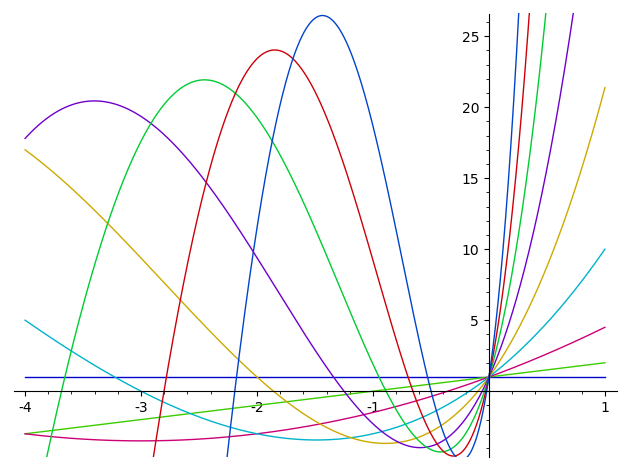

In [29]:
R = RiordanSquare((1 - 3*x)^(-1/3), 9, true).inverse()
F = [[sum((-1)^(n-i)*c*x^i for (i, c) in enumerate(R.row(n)))/factorial(n)] 
      for n in (0..8)]
P = plot(F, (x, -4, 1))
P.show(xmin=-4, xmax=1, ymin=-4, ymax=26)

### Library Function

In [30]:
def DelehamDelta(R, S, dim=0):
    x, y = var('x, y')
    r = toList(R, dim) 
    s = toList(S, dim) 
    dim = min(len(r), len(s))
    g = SR(0)
    for n in range(dim-1, -1, -1):
        g = (r[n]*y + s[n]*x*y)/(SR(1) - g)
    ser = (1/(1 - g)).series(y, dim)
    return [expand(p).list() for p in ser.list()]

### Examples

In [31]:
DelehamDelta((1 + x - x^2)/(1 - 2*x^2 + x^4), 1, 8)

[[1],
 [1, 1],
 [2, 3, 1],
 [5, 9, 5, 1],
 [15, 29, 20, 7, 1],
 [52, 102, 77, 35, 9, 1],
 [203, 392, 302, 157, 54, 11, 1],
 [877, 1641, 1235, 683, 277, 77, 13, 1]]

In [32]:
def R(n): return 1 if 2.divides(n) else (n+1)//2
def S(n): return 0^n
DelehamDelta(R, S, 8)

[[1],
 [1, 1],
 [2, 3, 1],
 [5, 9, 5, 1],
 [15, 29, 20, 7, 1],
 [52, 102, 77, 35, 9, 1],
 [203, 392, 302, 157, 54, 11, 1],
 [877, 1641, 1235, 683, 277, 77, 13, 1]]

In [33]:
DelehamDelta([1, 1, 1, 2, 1, 3, 1, 4], [1, 0, 0, 0, 0, 0, 0, 0])

[[1],
 [1, 1],
 [2, 3, 1],
 [5, 9, 5, 1],
 [15, 29, 20, 7, 1],
 [52, 102, 77, 35, 9, 1],
 [203, 392, 302, 157, 54, 11, 1],
 [877, 1641, 1235, 683, 277, 77, 13, 1]]

In [34]:
DelehamDelta(1/(1-2*x), 1/(1-x^2), 7)

[[1],
 [1, 1],
 [3, 4, 1],
 [17, 25, 9, 1],
 [171, 258, 102, 16, 1],
 [3113, 4635, 1788, 290, 25, 1],
 [106419, 154048, 54909, 7910, 665, 36, 1]]

In [35]:
DelehamDelta(lambda n: 2^n, lambda n: 1 - n%2, 7)

[[1],
 [1, 1],
 [3, 4, 1],
 [17, 25, 9, 1],
 [171, 258, 102, 16, 1],
 [3113, 4635, 1788, 290, 25, 1],
 [106419, 154048, 54909, 7910, 665, 36, 1]]

In [36]:
DelehamDelta([1, 2, 4, 8, 16, 32, 64], [1, 0, 1, 0, 1, 0, 1])

[[1],
 [1, 1],
 [3, 4, 1],
 [17, 25, 9, 1],
 [171, 258, 102, 16, 1],
 [3113, 4635, 1788, 290, 25, 1],
 [106419, 154048, 54909, 7910, 665, 36, 1]]

### Library Function

In [37]:
def ProductionMatrix(g, dim, expo=false):
    R = RiordanSquare(g, dim+1, expo)
    I = R.inverse()
    r = matrix([R.row(n)[0:dim] for n in (1..dim)])
    i = matrix([I.row(n)[0:dim] for n in (0..dim-1)])
    P = i * r
    R = matrix.identity(dim)
    for n in (0..dim-2): 
        for k in (0..n):
            R[n+1, k] = P[n, k]
    return R

### Examples

In [38]:
g = (1-2*x)^(-1/2)
ProductionMatrix(g, 8, expo=true)

[  1   0   0   0   0   0   0   0]
[  1   1   0   0   0   0   0   0]
[  2   4   1   0   0   0   0   0]
[  2  10   7   1   0   0   0   0]
[  0  12  24  10   1   0   0   0]
[  0   0  36  44  13   1   0   0]
[  0   0   0  80  70  16   1   0]
[  0   0   0   0 150 102  19   1]

In [39]:
R = RiordanSquare(g, 9, true).inverse()
for n in (0..8): print([(-1)^(n-k)*c 
    for (k, c) in enumerate(R.row(n)[:n+1])])

[1]
[1, 1]
[2, 5, 1]
[6, 27, 12, 1]
[24, 168, 123, 22, 1]
[120, 1200, 1275, 365, 35, 1]
[720, 9720, 13950, 5655, 855, 51, 1]
[5040, 88200, 163170, 87465, 18480, 1722, 70, 1]
[40320, 887040, 2046240, 1387680, 383145, 49476, 3122, 92, 1]


In [40]:
f = (1 - 3*x)^(-1/3) 
ProductionMatrix(f, 8, expo=true)

[  1   0   0   0   0   0   0   0]
[  1   1   0   0   0   0   0   0]
[  3   5   1   0   0   0   0   0]
[  6  18   9   1   0   0   0   0]
[  6  42  45  13   1   0   0   0]
[  0  48 132  84  17   1   0   0]
[  0   0 180 300 135  21   1   0]
[  0   0   0 480 570 198  25   1]

In [41]:
R = RiordanSquare((1 - 3*x)^(-1/3), 9, true).inverse()
for n in (0..8): print([(-1)^(n-k)*c 
    for (k, c) in enumerate(R.row(n)[:n+1])])

[1]
[1, 1]
[2, 6, 1]
[6, 38, 15, 1]
[24, 272, 188, 28, 1]
[120, 2200, 2340, 580, 45, 1]
[720, 19920, 30280, 11040, 1390, 66, 1]
[5040, 199920, 413560, 206920, 37450, 2842, 91, 1]
[40320, 2204160, 5989760, 3931200, 955920, 102816, 5208, 120, 1]
